In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
len(diabetes_data.columns)

9

In [5]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [70]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [71]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [73]:
diabetes_data_mean= diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].mean())
diabetes_data_mean

0      155.548223
1      155.548223
2      155.548223
3       94.000000
4      168.000000
          ...    
763    180.000000
764    155.548223
765    112.000000
766    155.548223
767    155.548223
Name: Insulin, Length: 768, dtype: float64

In [74]:
diabetes_data[diabetes_data.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [82]:
diabetes_data['Outcome'] = diabetes_data['Outcome'].replace('O', 0)

In [83]:
diabetes_data['Outcome'] = diabetes_data['Outcome'].astype(int)

In [84]:
diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [85]:
df_filled = diabetes_data.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)
df_filled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [86]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [88]:
df_filled.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI        DiabetesPedigreeFunction  Age  Outcome
0            57.0     60.000000      29.15342       155.548223  21.700000  0.735                     67   0          1
             67.0     76.000000      29.15342       155.548223  45.300000  0.194                     46   0          1
5            104.0    74.000000      29.15342       155.548223  28.800000  0.153                     48   0          1
             105.0    72.000000      29.00000       325.000000  36.900000  0.159                     28   0          1
             106.0    82.000000      30.00000       155.548223  39.500000  0.286                     38   0          1
                                                                                                                    ..
2            84.0     72.405184      29.15342       155.548223  32.457464  0.304                     21   0          1
             85.0     65.000000      29.15342       1

In [89]:
# Check for missing values in 'Glucose' column
print("Missing values in diabetic glucose:", diabetic_glucose.isnull().sum())
print("Missing values in non-diabetic glucose:", non_diabetic_glucose.isnull().sum())


Missing values in diabetic glucose: 0
Missing values in non-diabetic glucose: 0


In [90]:
# Convert 'Glucose' column to numeric if needed
df_filled['Glucose'] = pd.to_numeric(df_filled['Glucose'], errors='coerce')  # coerce to handle non-numeric values

In [91]:
import scipy.stats as stats

# t-test between 'Glucose' levels for diabetic and non-diabetic patients
diabetic_glucose = df_filled[df_filled['Outcome'] == 1]['Glucose']
non_diabetic_glucose = df_filled[df_filled['Outcome'] == 0]['Glucose']

t_stat, p_value = stats.ttest_ind(diabetic_glucose, non_diabetic_glucose)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")


T-test: t-statistic = 15.67989823120835, p-value = 2.909251656846331e-48


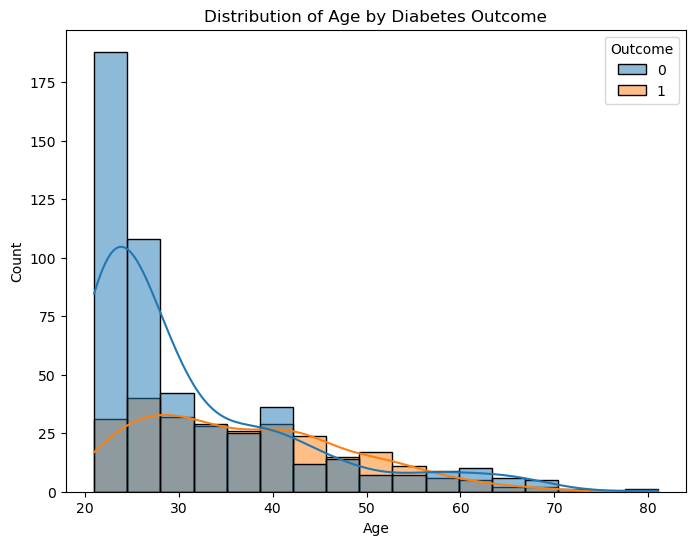

In [106]:
#Distribution of 'Age' among diabetic and non-diabetic patients

plt.figure(figsize=(8, 6))
sns.histplot(data=df_filled, x='Age', hue='Outcome', kde=True)
plt.title('Distribution of Age by Diabetes Outcome')
plt.show()


Text(0.5, 1.0, 'Scatter Plot of Age vs. Outcome')

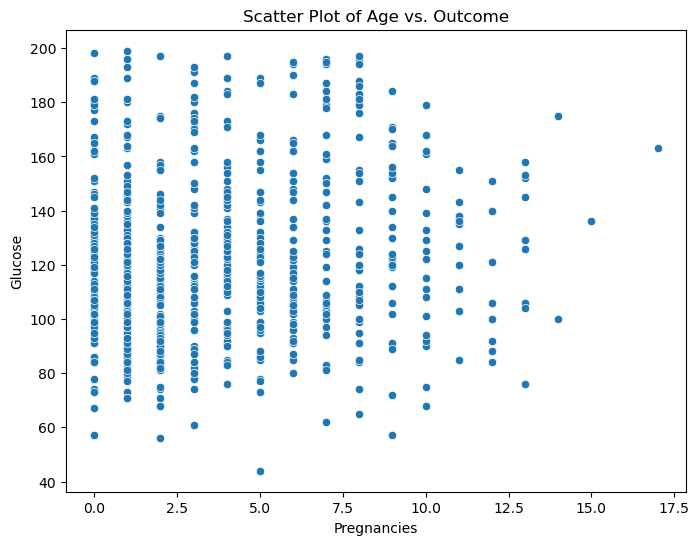

In [120]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filled, x='Pregnancies', y='Glucose')
plt.title('Scatter Plot of Age vs. Outcome')

/var/folders/4m/fmdhb3vs3k3772b1d17901p00000gp/T/ipykernel_92641/592643677.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_filled, x='Pregnancies', y='Age', estimator=lambda x: len(x), ci=None)


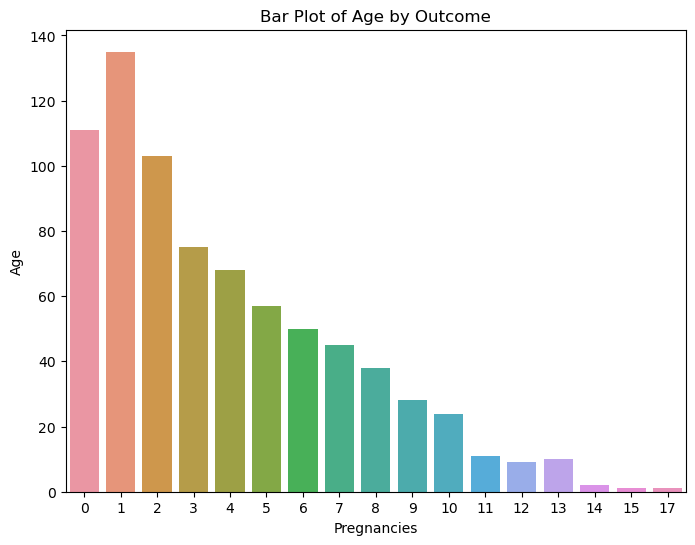

In [121]:
#bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df_filled, x='Pregnancies', y='Age', estimator=lambda x: len(x), ci=None)
plt.title('Bar Plot of Age by Outcome')
plt.show()

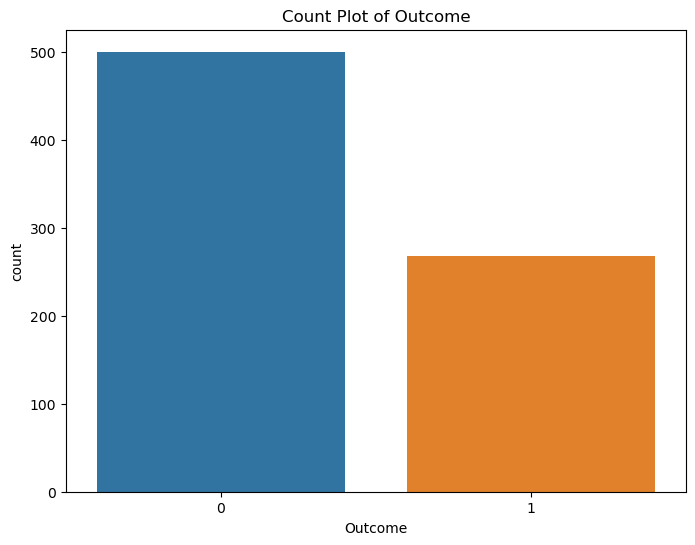

In [118]:
# Count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_filled, x='Outcome')
plt.title('Count Plot of Outcome')
plt.show()

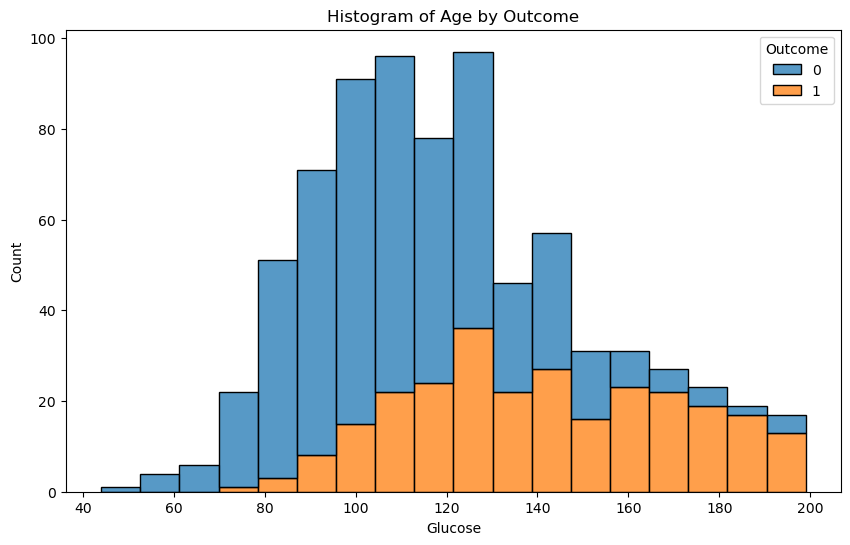

In [117]:
# Histogram plot with hue
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filled, x='Glucose', hue='Outcome', multiple='stack')
plt.title('Histogram of Age by Outcome')
plt.show()


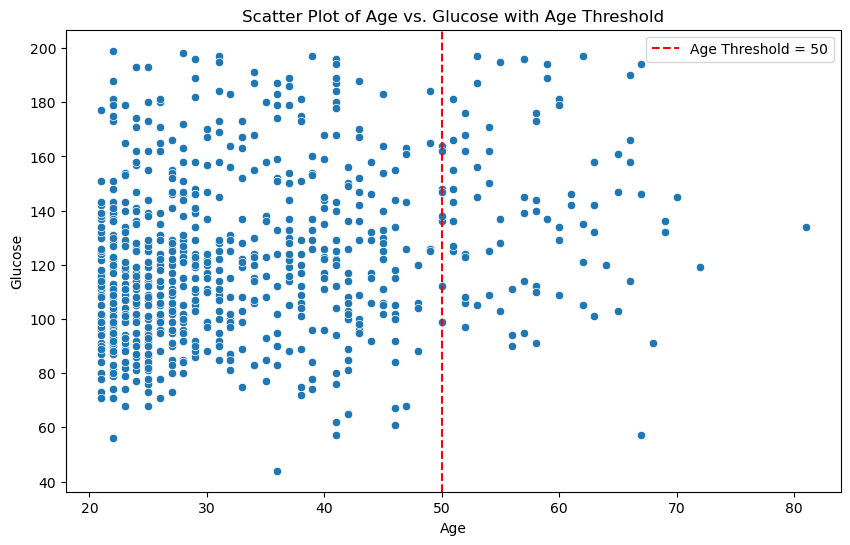

In [123]:

# Define the threshold for Age
age_threshold = 50

# Scatter plot with threshold line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filled, x='Age', y='Glucose')

# Add a vertical line for the Age threshold
plt.axvline(x=age_threshold, color='red', linestyle='--', label=f'Age Threshold = {age_threshold}')

# Add labels and title
plt.title('Scatter Plot of Age vs. Glucose with Age Threshold')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()

# Show the plot
plt.show()


In [128]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression

X = df_filled[['Glucose', 'Age']]
y = df_filled['Outcome']
model = LogisticRegression()
model.fit(X, y)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [-6.25513597]
Coefficients: [[0.03840762 0.02422503]]


/Users/Surface1/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


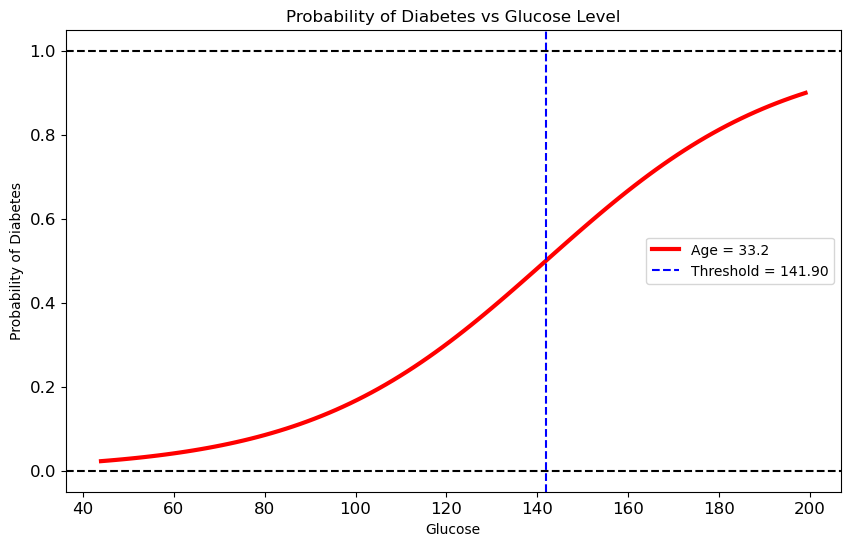

In [135]:

# Extract features and target
X = df_filled[['Glucose', 'Age']]
y = df_filled['Outcome']

# Create and fit the model
model = LogisticRegression()
model.fit(X, y)

# Create a range of Glucose values
glucose_range = np.linspace(df_filled['Glucose'].min(), df_filled['Glucose'].max(), 100)

# Keep Age constant (e.g., at the mean age)
age_constant = np.mean(df_filled['Age'])

# Create a grid of values
sample_x = np.array([[glucose, age_constant] for glucose in glucose_range])

# Predict probabilities
probabilities = model.predict_proba(sample_x)[:, 1]

# Calculate the decision boundary (threshold)
coef = model.coef_[0]
intercept = model.intercept_[0]
# Solve for glucose when probability is 0.5 (decision boundary)
threshold_glucose = -intercept / coef[0] - (coef[1] * age_constant / coef[0])

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(glucose_range, probabilities, color='red', linewidth=3, label=f'Age = {age_constant:.1f}')
plt.axvline(x=threshold_glucose, color='blue', linestyle='--', label=f'Threshold = {threshold_glucose:.2f}')
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes')
plt.title('Probability of Diabetes vs Glucose Level')
plt.legend()

# Customization for readability
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

plt.show()
